# Pandas 3: Time Series and "Real-World" Examples

A common use of a `DataFrame` in `pandas` is store time series data, where each row corresponds to data collected at a different time stamp. Today's lecture will focus on using `pandas` to work with these kinds of time series datasets along with various applications for analysis.

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Python `datetime` - format that handles dates and times

Before diving into `pandas`, let's see how Python handles date-format data.

In [2]:
# Create simple datetimes
t1a = datetime(1999, 1, 1) # year, month, day
t2a = datetime(2000, 1, 1)
t1b = datetime(1999, 12, 31)
t2b = datetime(2000, 12, 31)
print(t1a)
print(t2a)
print(t1b)
print(t2b)

1999-01-01 00:00:00
2000-01-01 00:00:00
1999-12-31 00:00:00
2000-12-31 00:00:00


In [3]:
# We can do math with these
print(t1b, "-", t1a)
print("=", t1b - t1a)
print(t2b, "-", t2a)
print("=", t2b - t2a)

1999-12-31 00:00:00 - 1999-01-01 00:00:00
= 364 days, 0:00:00
2000-12-31 00:00:00 - 2000-01-01 00:00:00
= 365 days, 0:00:00


In [4]:
# Here are more precise ones
t3a = datetime(1999, 1 ,1 ,12 ,5 ,7 ,8) # year, month, day, hr, minute, second, microsecond
t3b = datetime(1999, 1, 1, 13, 45, 3, 2)
print(t3a)
print(t3b)
print(t3b - t3a)

1999-01-01 12:05:07.000008
1999-01-01 13:45:03.000002
1:39:55.999994


## `pandas` Example: Landslide Catalog

Here we will analyze a global catalog of landslides, obtained from Kaggle (https://www.kaggle.com/datasets/sathyanarayanrao89/global-landslide-catalog) 

This is a compilation obtained from two references:

[1] Kirschbaum, D. B., Adler, R., Hong, Y., Hill, S., & Lerner-Lam, A. (2010). A global landslide catalog for hazard applications: method, results, and limitations. Natural Hazards, 52(3), 561–575. doi:10.1007/s11069-009-9401-4.

[2] Kirschbaum, D.B., T. Stanley, Y. Zhou (2015). Spatial and Temporal Analysis of a Global Landslide Catalog. Geomorphology. doi:10.1016/j.geomorph.2015.03.016.


### Read Data

In [5]:
## Load data

# read in data
ldf = pd.read_csv("lecture16_landslides.csv")

# show results
ldf

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395


In [6]:
### Check Out Columns / Data types

# look at event_date
print(ldf["event_date"].values[0:5])

# notice the event_date column is an "object", likely a string
ldf.info()

['08/01/2008 12:00:00 AM' '01/02/2009 02:00:00 AM'
 '01/19/2007 12:00:00 AM' '07/31/2009 12:00:00 AM'
 '10/16/2010 12:00:00 PM']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11

### `datetime64` is a data type that Python uses for times 

`pandas` can convert to `datetime64` using `pd.to_datetime(...)`.

In [7]:
### Convert this to DateTime

# conversion to datetime
ldf["event_date"] = pd.to_datetime(ldf["event_date"])

# look again at event_date
print(ldf["event_date"].values[0:5])

# notice the event_date column has changed type
ldf.info()

['2008-08-01T00:00:00.000000000' '2009-01-02T02:00:00.000000000'
 '2007-01-19T00:00:00.000000000' '2009-07-31T00:00:00.000000000'
 '2010-10-16T12:00:00.000000000']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                11033 non-null  object        
 1   source_link                10187 non-null  object        
 2   event_id                   11033 non-null  int64         
 3   event_date                 11033 non-null  datetime64[ns]
 4   event_time                 0 non-null      float64       
 5   event_title                11033 non-null  object        
 6   event_description          10171 non-null  object        
 7   location_description       10931 non-null  object        
 8   location_accuracy          11031 non-null  object        
 9   landslide_category         11

/var/folders/kl/4dph4pbn6_jb3w7xn7n1lhmm0000gn/T/ipykernel_1561/2577777610.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ldf["event_date"] = pd.to_datetime(ldf["event_date"])


#### Pandas can also convert to `datetime64` "on read" when importing a file using `parse_dates`

In [8]:
### We can actually do all of this in one step

# read in data
ldf = pd.read_csv("lecture16_landslides.csv", parse_dates=["event_date"])

# show data types
ldf.info()

/var/folders/kl/4dph4pbn6_jb3w7xn7n1lhmm0000gn/T/ipykernel_1561/822408628.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ldf = pd.read_csv("lecture16_landslides.csv", parse_dates=["event_date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                11033 non-null  object        
 1   source_link                10187 non-null  object        
 2   event_id                   11033 non-null  int64         
 3   event_date                 11033 non-null  datetime64[ns]
 4   event_time                 0 non-null      float64       
 5   event_title                11033 non-null  object        
 6   event_description          10171 non-null  object        
 7   location_description       10931 non-null  object        
 8   location_accuracy          11031 non-null  object        
 9   landslide_category         11032 non-null  object        
 10  landslide_trigger          11010 non-null  object        
 11  landslide_size             11024 non-null  object        
 12  land

### Datetime and Groupby

In [9]:
### Add Columns using dt tools:

# notice .dt. syntax
ldf["year"] = ldf["event_date"].dt.year
ldf["month"] = ldf["event_date"].dt.month

# show results
ldf[["event_date", "year", "month"]]

,event_date,year,month
0,2008-08-01 00:00:00,2008,8
1,2009-01-02 02:00:00,2009,1
2,2007-01-19 00:00:00,2007,1
3,2009-07-31 00:00:00,2009,7
4,2010-10-16 12:00:00,2010,10
...,...,...,...
11028,2017-04-01 13:34:00,2017,4
11029,2017-03-25 17:32:00,2017,3
11030,2016-12-15 05:00:00,2016,12
11031,2017-04-29 19:03:00,2017,4


#### How are landslides distributed by month?

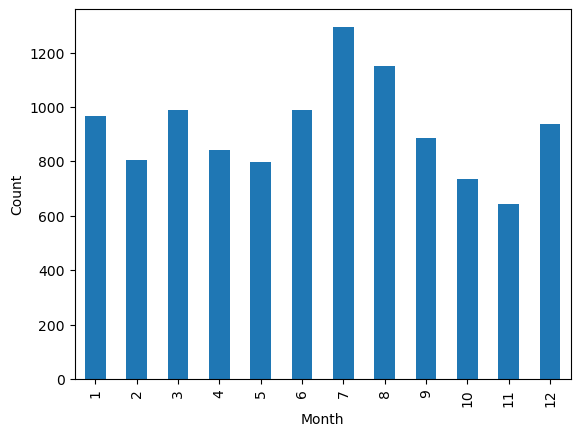

In [10]:
### Using Groupby to Assess Landslides by Month

# divide dataset into groups by month
mdf = ldf.groupby("month")

# plot event counts by month
mdf["event_id"].count().plot(kind='bar') # any non-null column would work
plt.ylabel("Count")
plt.xlabel("Month");

#### Separate by events N/S of equator

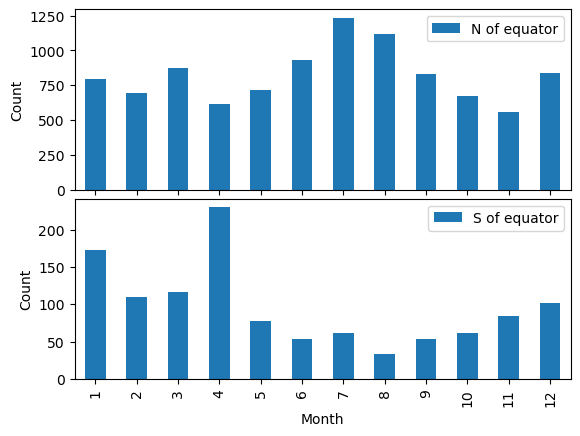

In [11]:
### Landslides by month - Separate by latitude

# figure setup
fig, axi = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

# northern hemisphere
idx = ldf["latitude"] > 0.0
mdf = ldf[idx].groupby("month")
mdf["event_id"].count().plot(kind='bar', ax=axi[0], label="N of equator")


# southern hemisphere
idx = ldf["latitude"] < 0.0
mdf = ldf[idx].groupby("month")
mdf["event_id"].count().plot(kind='bar', ax=axi[1], label="S of equator")

# formatting
axi[0].legend()
axi[1].legend()
axi[0].set_ylabel("Count")
axi[1].set_ylabel("Count")
axi[1].set_xlabel("Month");

#### Mean injury counts by month

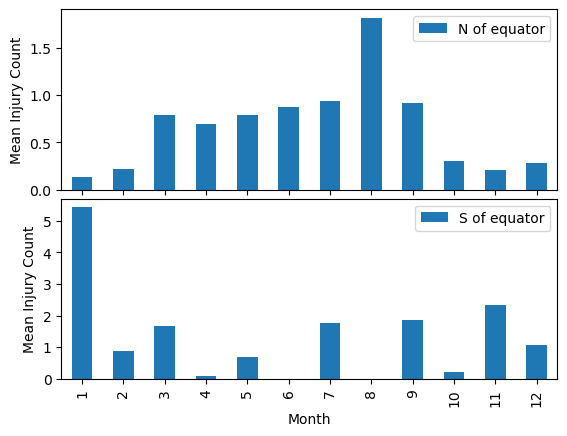

In [12]:
### Landslides by month - Separate by latitude

# figure setup
fig, axi = plt.subplots(2,1,sharex=True)
fig.subplots_adjust(hspace=0.05)

# northern hemisphere
idx = ldf["latitude"] > 0.0
mdf = ldf[idx].groupby("month")
mdf["injury_count"].mean().plot(kind='bar', ax=axi[0], label="N of equator")

# southern hemisphere
idx = ldf["latitude"] < 0.0
mdf = ldf[idx].groupby("month")
mdf["injury_count"].mean().plot(kind='bar', ax=axi[1], label="S of equator")

# formatting
axi[0].legend()
axi[1].legend()
axi[0].set_ylabel("Mean Injury Count")
axi[1].set_ylabel("Mean Injury Count")
axi[1].set_xlabel("Month");

In [13]:
### Define Size Index

# unique categories
print(ldf["landslide_size"].value_counts())

# assign these to values
sizeD = {
    "small":        1,
    "medium":       3.33,
    "large":        10,
    "very_large":   33.3,
    "catastrophic": 100,
    "unknown": np.nan,
}

# map categories to values
ldf["size_index"] = ldf["landslide_size"].map(sizeD)

# check results
ldf[["landslide_size","size_index"]]

landslide_size
medium          6551
small           2767
unknown          851
large            750
very_large       102
catastrophic       3
Name: count, dtype: int64


,landslide_size,size_index
0,large,10.00
1,small,1.00
2,large,10.00
3,medium,3.33
4,medium,3.33
...,...,...
11028,medium,3.33
11029,small,1.00
11030,small,1.00
11031,large,10.00


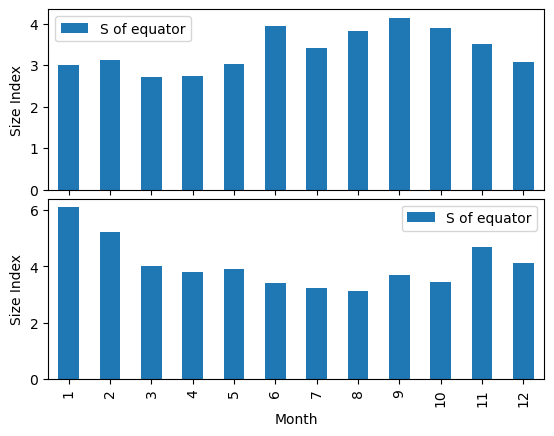

In [14]:
### Landslides by month - Separate by latitude

# figure setup
fig, axi = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

# northern hemisphere
idx = ldf["latitude"] > 0.0
mdf = ldf[idx].groupby("month")
mdf["size_index"].mean().plot(kind='bar', ax=axi[0], label="S of equator")

# southern hemisphere
idx = ldf["latitude"] < 0.0
mdf = ldf[idx].groupby("month")
mdf["size_index"].mean().plot(kind='bar', ax=axi[1], label="S of equator")

# formatting
axi[0].legend()
axi[1].legend()
axi[0].set_ylabel("Size Index")
axi[1].set_ylabel("Size Index")
axi[1].set_xlabel("Month");

### Math with Datetime

In [15]:
### Example: "Epoch Time"

# time difference since 1970-01-01
ldf["tepoch"] = ldf["event_date"] - pd.to_datetime("1970-01-01 00:00:00")

# show results
print(ldf[["event_date", "tepoch"]].info())

# show results
ldf[["event_date", "tepoch"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   event_date  11033 non-null  datetime64[ns] 
 1   tepoch      11033 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), timedelta64[ns](1)
memory usage: 172.5 KB
None


,event_date,tepoch
0,2008-08-01 00:00:00,14092 days 00:00:00
1,2009-01-02 02:00:00,14246 days 02:00:00
2,2007-01-19 00:00:00,13532 days 00:00:00
3,2009-07-31 00:00:00,14456 days 00:00:00
4,2010-10-16 12:00:00,14898 days 12:00:00
...,...,...
11028,2017-04-01 13:34:00,17257 days 13:34:00
11029,2017-03-25 17:32:00,17250 days 17:32:00
11030,2016-12-15 05:00:00,17150 days 05:00:00
11031,2017-04-29 19:03:00,17285 days 19:03:00


In [16]:
### Convert from Timedelta to Seconds

# number of seconds since 1970-01-01
ldf["tepoch"] = (ldf["event_date"] - pd.to_datetime("1970-01-01 00:00:00")).dt.total_seconds()

# show results
print(ldf[["event_date", "tepoch"]].info())

# show results
ldf[["event_date", "tepoch"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  11033 non-null  datetime64[ns]
 1   tepoch      11033 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 172.5 KB
None


,event_date,tepoch
0,2008-08-01 00:00:00,1.217549e+09
1,2009-01-02 02:00:00,1.230862e+09
2,2007-01-19 00:00:00,1.169165e+09
3,2009-07-31 00:00:00,1.248998e+09
4,2010-10-16 12:00:00,1.287230e+09
...,...,...
11028,2017-04-01 13:34:00,1.491054e+09
11029,2017-03-25 17:32:00,1.490463e+09
11030,2016-12-15 05:00:00,1.481778e+09
11031,2017-04-29 19:03:00,1.493493e+09


#### `datetime` units
* 'Y' - year
* 'M' - month
* 'W' - week
* 'D' - day
* 'h' - hour
* 'm' - minute
* 's' - second
* 'ms' - millisecond
* 'ns' - nanosecond
* units go all the way to attoseconds!

Example: Dividing a `timedelta64` variable by `np.timedelta(1,'D')` will convert to days (data type = `float`)

In [17]:
### Another approach, more flexible

# number of seconds since 1970-01-01
ldf["tepoch"] = (ldf["event_date"] - pd.to_datetime("1970-01-01 00:00:00")) / (
    pd.to_timedelta(1, unit="s") ) # advantage is we could also do days, hours, etc.

# show results
print(ldf[["event_date", "tepoch"]].info())

# show results
ldf[["event_date", "tepoch"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  11033 non-null  datetime64[ns]
 1   tepoch      11033 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 172.5 KB
None


,event_date,tepoch
0,2008-08-01 00:00:00,1.217549e+09
1,2009-01-02 02:00:00,1.230862e+09
2,2007-01-19 00:00:00,1.169165e+09
3,2009-07-31 00:00:00,1.248998e+09
4,2010-10-16 12:00:00,1.287230e+09
...,...,...
11028,2017-04-01 13:34:00,1.491054e+09
11029,2017-03-25 17:32:00,1.490463e+09
11030,2016-12-15 05:00:00,1.481778e+09
11031,2017-04-29 19:03:00,1.493493e+09


#### Cumulative Landslides within a Year

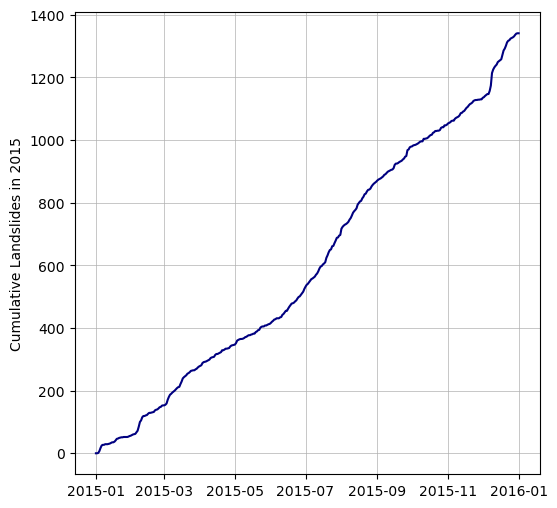

In [18]:
### Landslides by Day within Year

# study year 2015
idx = ldf["event_date"].dt.year == 2015

# compute fractional day with year
fyr = (ldf.loc[idx,"event_date"] - pd.to_datetime("2015-01-01"))/(
    pd.to_timedelta(1, unit="D"))

# compute cumulative events per year
xx = np.linspace(0, 365, 366)
yy = np.zeros_like(xx)
for ii, tt in enumerate(xx):
    yy[ii] = (fyr <= tt).sum()

# convert x-axis to date time for plotting
yt = pd.to_datetime("2015-01-01") + pd.to_timedelta(xx, unit="D")

# plot results
fig,axi = plt.subplots(figsize=(6,6))
axi.plot(yt, yy, "-", color="navy")
axi.grid(lw=0.5)
axi.set_ylabel("Cumulative Landslides in 2015")
plt.show()

## Example using `pandas` and `datetime`: Ridgecrest, CA Earthquakes

The Ridgecrest Earthquake Sequence occured in Eastern California in July of 2019. The two largest events, M6.4 and M7.1, are the two largest earthquakes in California in the 21st century. The file "lecture16-ridgecrest-earthquakes.txt" is an earthquake catalog (a listing of event locations, times, and magnitudes) that I created during my research. This is a special type of "relocated" catalog with precise hypocentral locations. 

We'll use this as an example today of how we can use `pandas` to manipulate geoscientific data.

### Load in the data using `pd.read_csv()`

In [19]:
# catalog columns
cols = ['year','month','day','hour','minute','second','evid',
        'rlat','rlon','rdep','mag','evnum','clustid','nbranch',
        'npair','ndiffP','ndiffS','rmsP','rmsS','eh','ez','et',
        'clat','clon','cdep']

# read database
quake_file = "lecture16-ridgecrest-earthquakes.txt"
qdf = pd.read_csv(quake_file,index_col=None,
                header=None,names=cols,sep='\s+')

qdf.head()

,year,month,day,hour,minute,second,evid,rlat,rlon,rdep,...,ndiffP,ndiffS,rmsP,rmsS,eh,ez,et,clat,clon,cdep
0,2000,1,1,1,14,19.410,9131998,35.70400,-117.63200,3.300,...,0,0,0.00,0.00,-1.000,-1.000,-1.000,35.70400,-117.6320,3.3
1,2000,1,1,3,10,16.861,9132005,35.73933,-117.66694,3.935,...,59,39,0.06,0.06,0.145,0.339,0.018,35.74000,-117.6650,3.6
2,2000,1,1,10,39,41.668,9132058,35.73916,-117.66714,3.836,...,55,37,0.08,0.08,0.119,0.298,0.016,35.73300,-117.6700,3.2
3,2000,1,1,17,38,46.561,9132103,35.73880,-117.66794,3.814,...,32,28,0.04,0.04,0.117,0.293,0.017,35.73900,-117.6600,3.7
4,2000,1,1,20,59,51.280,9132126,35.74183,-117.66250,6.700,...,0,0,0.00,0.00,-1.000,-1.000,-1.000,35.74183,-117.6625,6.7


In [20]:
### Examine catalog info

qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43742 entries, 0 to 43741
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     43742 non-null  int64  
 1   month    43742 non-null  int64  
 2   day      43742 non-null  int64  
 3   hour     43742 non-null  int64  
 4   minute   43742 non-null  int64  
 5   second   43742 non-null  float64
 6   evid     43742 non-null  int64  
 7   rlat     43742 non-null  float64
 8   rlon     43742 non-null  float64
 9   rdep     43742 non-null  float64
 10  mag      43742 non-null  float64
 11  evnum    43742 non-null  int64  
 12  clustid  43742 non-null  int64  
 13  nbranch  43742 non-null  int64  
 14  npair    43742 non-null  int64  
 15  ndiffP   43742 non-null  int64  
 16  ndiffS   43742 non-null  int64  
 17  rmsP     43742 non-null  float64
 18  rmsS     43742 non-null  float64
 19  eh       43742 non-null  float64
 20  ez       43742 non-null  float64
 21  et       437

### Some of the events are relocated, some are not

For examining spatial statistics, we'll work with the relocated subset.

In [21]:
# Count relocated events
ireloc = qdf["nbranch"] > 1
print("Relocated events: ", ireloc.sum(), "/", len(qdf))

Relocated events:  38218 / 43742


In [22]:
# How far did the events move?

# compute shifts
latshift = qdf.loc[ireloc, "rlat"] - qdf.loc[ireloc, "clat"]
lonshift = qdf.loc[ireloc, "rlon"] - qdf.loc[ireloc, "clon"]
depshift = qdf.loc[ireloc, "rdep"] - qdf.loc[ireloc, "cdep"]

# median shifts are small -> no change on average
print("Median latitude shift: {:.6f} deg.".format(latshift.median()))
print("Median longitude shift: {:.6f} deg.".format(lonshift.median()))
print("Median depth shift: {:.6f} km.".format(depshift.median()))

# median absolute shifts are larger though, so events are moved
print()
print("Median absolute latitude shift: {:.6f} deg.".format(
    latshift.abs().median()))
print("Median absolute longitude shift: {:.6f} deg.".format(
    lonshift.abs().median()))
print("Median absolute depth shift: {:.6f} km.".format(
    depshift.abs().median()))


Median latitude shift: 0.000070 deg.
Median longitude shift: 0.000270 deg.
Median depth shift: -0.001000 km.

Median absolute latitude shift: 0.001910 deg.
Median absolute longitude shift: 0.002860 deg.
Median absolute depth shift: 0.637000 km.


In [23]:
# Easier to think in km...

# compute shifts in km
lat0 = qdf["rlat"].median() # center of dataset
latshiftKM = latshift * 111.2 # about 111 km per degree
lonshiftKM = lonshift * 111.2 * np.cos(lat0*np.pi/180.0) # account for latitude

# median absolute shifts are larger though, so events are moved
print("Median absolute latitude shift: {:.6f} km.".format(
    latshiftKM.abs().median()))
print("Median absolute longitude shift: {:.6f} km.".format(
    lonshiftKM.abs().median()))
print("Median absolute depth shift: {:.6f} km.".format(
    depshift.abs().median()))

Median absolute latitude shift: 0.212392 km.
Median absolute longitude shift: 0.257964 km.
Median absolute depth shift: 0.637000 km.


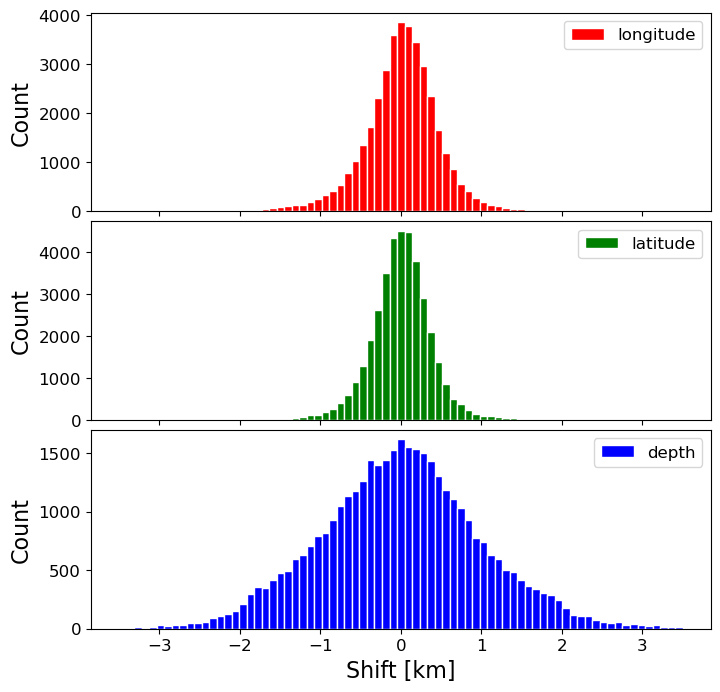

In [24]:
# Histograms of this

# figure setup
fig, axi = plt.subplots(3,1,sharex=True,figsize=(8,8))
fig.subplots_adjust(hspace=0.05)

# bins to plot
binE = np.linspace(-3.5,3.5,76)

# plot data
axi[0].hist(lonshiftKM,binE,color="r",edgecolor="w",label="longitude");
axi[1].hist(latshiftKM,binE,color="g",edgecolor="w",label="latitude");
axi[2].hist(depshift,binE,color="b",edgecolor="w",label="depth");

# formatting details
for ax in axi:
    ax.set_ylabel("Count", fontsize=16)
    ax.legend(loc="best", fontsize=12)
    ax.tick_params(labelsize=12)
axi[-1].set_xlabel("Shift [km]",fontsize=16);

### Compute Origin Time of Each Event

In [25]:
# pd.to_datetime works if we name our columns exactly this way
qdf['rotime'] = pd.to_datetime(qdf[['year', 'month', 'day', 'hour', 'minute', 'second']])

qdf.head()

,year,month,day,hour,minute,second,evid,rlat,rlon,rdep,...,ndiffS,rmsP,rmsS,eh,ez,et,clat,clon,cdep,rotime
0,2000,1,1,1,14,19.410,9131998,35.70400,-117.63200,3.300,...,0,0.00,0.00,-1.000,-1.000,-1.000,35.70400,-117.6320,3.3,2000-01-01 01:14:19.410
1,2000,1,1,3,10,16.861,9132005,35.73933,-117.66694,3.935,...,39,0.06,0.06,0.145,0.339,0.018,35.74000,-117.6650,3.6,2000-01-01 03:10:16.861
2,2000,1,1,10,39,41.668,9132058,35.73916,-117.66714,3.836,...,37,0.08,0.08,0.119,0.298,0.016,35.73300,-117.6700,3.2,2000-01-01 10:39:41.668
3,2000,1,1,17,38,46.561,9132103,35.73880,-117.66794,3.814,...,28,0.04,0.04,0.117,0.293,0.017,35.73900,-117.6600,3.7,2000-01-01 17:38:46.561
4,2000,1,1,20,59,51.280,9132126,35.74183,-117.66250,6.700,...,0,0.00,0.00,-1.000,-1.000,-1.000,35.74183,-117.6625,6.7,2000-01-01 20:59:51.280


In [26]:
# another way of doing this, if you want different column names in the original df
ddf = pd.DataFrame(qdf.iloc[:,:6].values)
ddf.columns = ['year', 'month', 'day', 'hour', 'minute', 'second']
ddf["otime"] = pd.to_datetime(ddf[['year', 'month', 'day', 'hour', 'minute', 'second']])
ddf["otime"].head()

0   2000-01-01 01:14:19.410
1   2000-01-01 03:10:16.861
2   2000-01-01 10:39:41.668
3   2000-01-01 17:38:46.561
4   2000-01-01 20:59:51.280
Name: otime, dtype: datetime64[ns]

### Plot events by hour

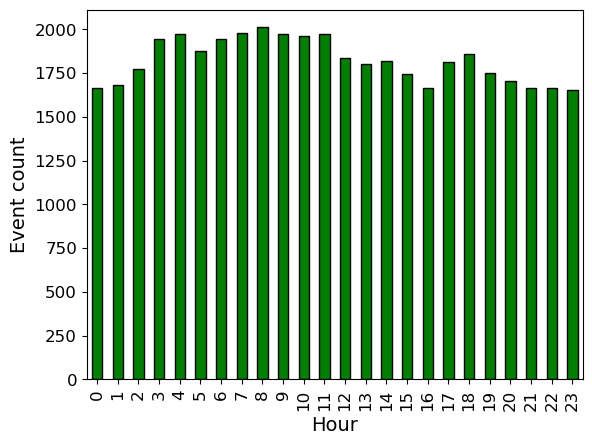

In [27]:
# Nothing too exciting here...
gdf = qdf.groupby("hour")
gdf["evid"].count().plot(kind="bar", color="g", edgecolor="k")
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Event count", fontsize=14)
plt.tick_params(labelsize=12);


### Plot events by month

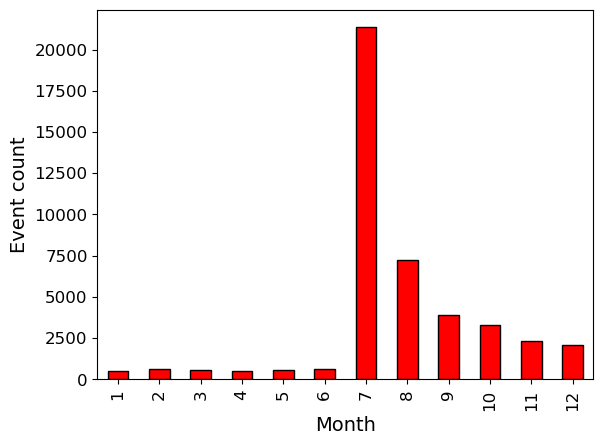

In [28]:
# Wow, July!
gdf = qdf.groupby("month")
gdf["evid"].count().plot(kind="bar", color="r", edgecolor="k")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Event count", fontsize=14)
plt.tick_params(labelsize=12);

### Plot events by year

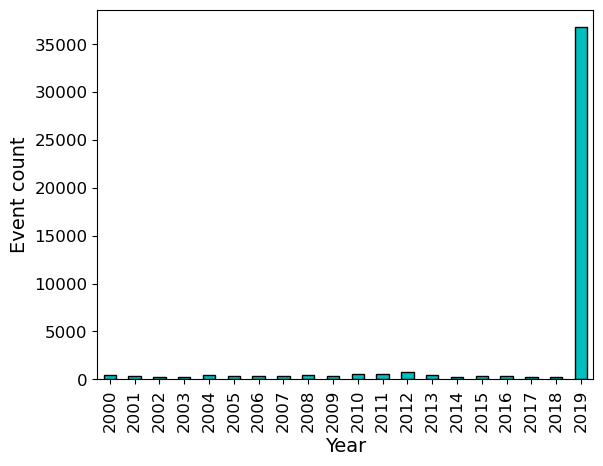

In [29]:
# Not much going on here until 2019!
gdf = qdf.groupby("year")
gdf["evid"].count().plot(kind="bar", color="c", edgecolor="k")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Event count", fontsize=14)
plt.tick_params(labelsize=12);

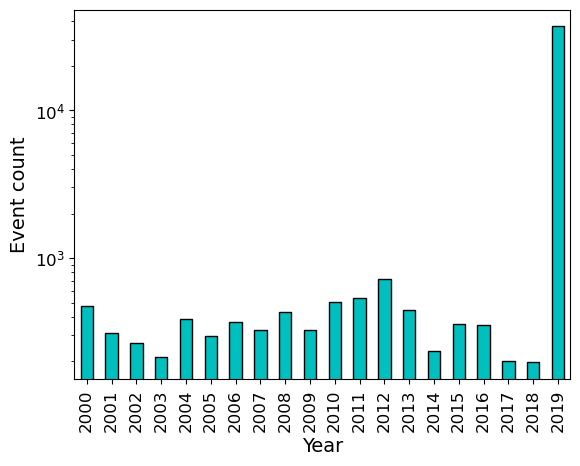

In [30]:
# Log scale is helpful...
gdf = qdf.groupby("year")
gdf["evid"].count().plot(kind="bar", color="c", edgecolor="k")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Event count", fontsize=14)
plt.yscale("log")
plt.tick_params(labelsize=12);

### Plot full time series of events

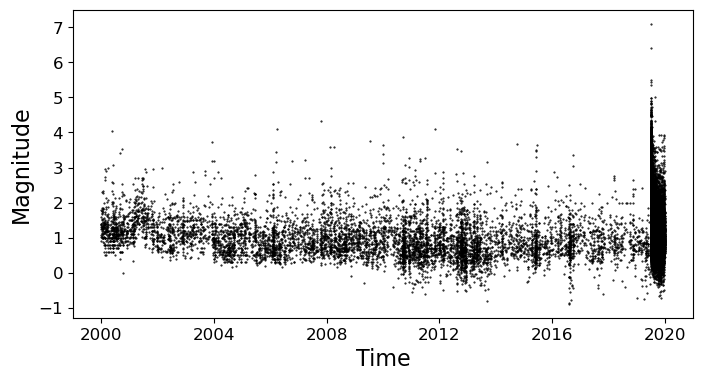

In [31]:
# Time on x-axis, magnitude on y axis
fig, axi = plt.subplots(figsize=(8,4))
axi.plot(qdf["rotime"], qdf["mag"], "k.", ms=1)
axi.set_xlabel("Time", fontsize=16)
axi.set_ylabel("Magnitude", fontsize=16)
axi.tick_params(labelsize=12);

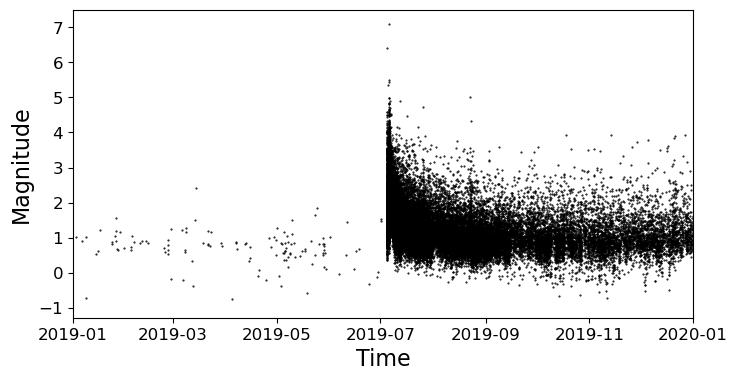

In [32]:
# Zoom in on 2019...
fig, axi = plt.subplots(figsize=(8,4))
axi.plot(qdf["rotime"], qdf["mag"], "k." ,ms=1)
axi.set_xlabel("Time", fontsize=16)
axi.set_ylabel("Magnitude", fontsize=16)
axi.set_xlim(pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01"))
axi.tick_params(labelsize=12);

### Rolling averages

`df["col"].rolling(...)` can be used to compute a statistic over a window of data.


In [33]:
# compute median magnitude in 300 event window
mmag = qdf["mag"].rolling(300, center=False).median()
mmag # median over a window of the previous 300 events

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
43737    1.075
43738    1.075
43739    1.075
43740    1.070
43741    1.070
Name: mag, Length: 43742, dtype: float64

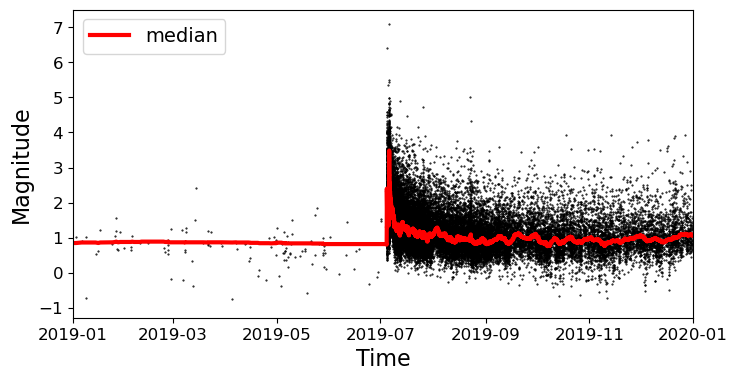

In [34]:
# magnitude vs time, zooming in on 2019
fig, axi = plt.subplots(figsize=(8,4))
axi.plot(qdf["rotime"], qdf["mag"], "k.", ms=1)
axi.set_xlabel("Time", fontsize=16)
axi.set_ylabel("Magnitude", fontsize=16)
axi.set_xlim(pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01"))
axi.tick_params(labelsize=12)

# plot the moving average
axi.plot(qdf["rotime"], mmag, "-r", lw=3, label="median")
axi.legend(loc="upper left", fontsize=14);

### Calculate time between events

In [35]:
# Calculate time difference in minutes
tdifD = qdf["rotime"].diff() / np.timedelta64(1,'m')

# Running median
mtdifD = tdifD.rolling(300, center=False).median()
mtdifD

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
43737    22.727317
43738    22.727317
43739    22.727317
43740    22.560333
43741    22.417125
Name: rotime, Length: 43742, dtype: float64

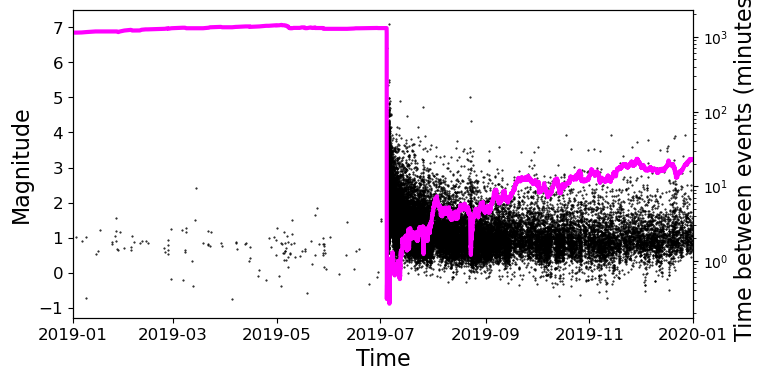

In [36]:
# Plot results, zooming in...

# plot magnitude versus time as before
fig, axi = plt.subplots(figsize=(8,4))
axi.plot(qdf["rotime"], qdf["mag"], "k.", ms=1)
axi.set_xlabel("Time", fontsize=16)
axi.set_ylabel("Magnitude", fontsize=16)
axi.tick_params(labelsize=12)
axi.set_xlim(pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01"))

# plot time between events on separate axis, log-scaled
axi2 = axi.twinx()
axi2.plot(qdf["rotime"], mtdifD,"-", color="magenta", lw=3)
axi2.set_yscale("log")
axi2.set_ylabel("Time between events (minutes)", fontsize=16)
axi2.set_xlim(pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01"));

# Summary
* Python uses a special data type called `datetime` to work with dates
* `datetime64` allows us to do precise math with dates in `DataFrames` or `arrays`
* in `pandas`, we can use `datetime64` columns just as any other type of data
* we can also use time series tools in `pandas` to do many other fun things
* `df.rolling()` is useful to apply moving averages to time series